In [1]:
# !pip install matplotlib

In [7]:
import pandas as pd
from nltk.tokenize import word_tokenize
import string
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [8]:
df = pd.read_csv('spam.csv')

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df.dropna(axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [13]:
df.describe()

,target,text
count,5572,5572
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
df.duplicated().sum()

414

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.describe()

,target,text
count,5158,5158
unique,2,5158
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [17]:
df.shape

(5158, 2)

<AxesSubplot:>

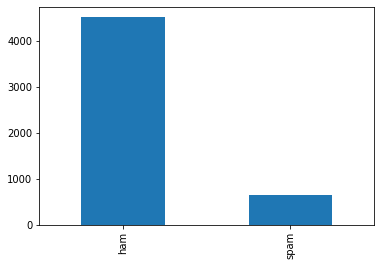

In [18]:
df['target'].value_counts().plot(kind='bar')

In [19]:
def preprocess_text(text):
    text = text.strip().lower()
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)
    text = re.sub(r'\s\s+', ' ', text)
    text_tokens = word_tokenize(text)
    text_tokens = [text_token for text_token in text_tokens if text_token.isalpha()]
    text_tokens = [text_token.translate(str.maketrans('', '', string.punctuation)) for text_token in text_tokens]
    stemmer = PorterStemmer()
    text_tokens = [stemmer.stem(text_token) for text_token in text_tokens if not text_token in set(stopwords.words('english'))]
    text = ' '.join(text_tokens)
    return text

In [20]:
df['clean_text'] = df['text'].apply(preprocess_text)

In [21]:
df.head()

,target,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt may ...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [22]:
cv = CountVectorizer()
X = cv.fit_transform(df['clean_text']).toarray()

In [23]:
label_encoder = LabelEncoder().fit(df['target'])
y = label_encoder.transform(df['target'])
label_encoder.classes_

array(['ham', 'spam'], dtype=object)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.3, stratify=y)

In [25]:
clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.980176,0.985136,0.982650,3162.000000
1,0.891455,0.859688,0.875283,449.000000
accuracy,0.969538,0.969538,0.969538,0.969538
macro avg,0.935816,0.922412,0.928967,3611.000000
weighted avg,0.969144,0.969538,0.969300,3611.000000


In [26]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.968914,0.995572,0.982062,3162.000000
1,0.961326,0.775056,0.858200,449.000000
accuracy,0.968153,0.968153,0.968153,0.968153
macro avg,0.965120,0.885314,0.920131,3611.000000
weighted avg,0.967970,0.968153,0.966661,3611.000000


In [27]:
# !pip install tensorflow
# !pip install tensorflow-text

In [28]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import  Dense
from tensorflow.keras import Input

2022-09-08 21:43:19.406032: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
model = Sequential([
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

2022-09-08 21:43:21.435310: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
model.build(X_train.shape) 

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1547, 32)                187136    
                                                                 
 dense_1 (Dense)             (1547, 64)                2112      
                                                                 
 dense_2 (Dense)             (1547, 1)                 65        
                                                                 
Total params: 189,313
Trainable params: 189,313
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.3)

Epoch 1/200
34/34 [==============================] - 1s 9ms/step - loss: 0.6487 - accuracy: 0.8503 - val_loss: 0.6073 - val_accuracy: 0.8774
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 0.5728 - accuracy: 0.8743 - val_loss: 0.5386 - val_accuracy: 0.8774
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 0.5125 - accuracy: 0.8743 - val_loss: 0.4862 - val_accuracy: 0.8774
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 0.4675 - accuracy: 0.8743 - val_loss: 0.4481 - val_accuracy: 0.8774
Epoch 5/200
34/34 [==============================] - 0s 6ms/step - loss: 0.4351 - accuracy: 0.8743 - val_loss: 0.4207 - val_accuracy: 0.8774
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 0.4114 - accuracy: 0.8743 - val_loss: 0.4009 - val_accuracy: 0.8774
Epoch 7/200
34/34 [==============================] - 0s 5ms/step - loss: 0.3939 - accuracy: 0.8743 - val_loss: 0.3864 - val_accuracy: 0.8774
Epoch 8/200
3

In [33]:
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

113/113 [==============================] - 0s 2ms/step


In [34]:
pd.DataFrame(classification_report(y_test, y_hat, output_dict=True)).T

,precision,recall,f1-score,support
0,0.971225,0.992726,0.981858,3162.000000
1,0.939314,0.792873,0.859903,449.000000
accuracy,0.967876,0.967876,0.967876,0.967876
macro avg,0.955270,0.892800,0.920881,3611.000000
weighted avg,0.967257,0.967876,0.966694,3611.000000


In [35]:
model.evaluate(X_test, y_test)

113/113 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9679


[0.11296577006578445, 0.9678759574890137]

In [36]:
# !pip install transformers[torch]
# !pip install transformers[tf-cpu]

In [49]:
x_train, x_test, y_train, y_test = train_test_split(df['clean_text'], df['target'], stratify=df['target'])

In [50]:
# !pip install simpletransformers
# !pip install torchvision 

In [51]:
from simpletransformers.classification import ClassificationModel

In [52]:
model = ClassificationModel('xlnet', 'xlnet-base-cased', use_cuda=False, args={'num_train_epochs':4, 'train_batch_size':32, 'max_seq_length':128}) # You can set class weights by using the optional weight argument

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight', 'logits_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [53]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train

In [ ]:
model.train_model(train_df)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/simpletransformers/classification/classification_model.py:601: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1547 [00:00<?, ?it/s]

In [ ]:
eval_df = pd.DataFrame(X_test)
eval_df['target'] = y_test

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df, acc=accuracy_score)